In [0]:
import os
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from PIL import Image

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
imagename = [] 
targetlabel=[]
lis=['A','B','C','D','E','F','G','H','I','J']           
for images in os.listdir('/content/drive/My Drive/FACE_DATABASE'): #enter suitable path 
    print(images)
    imagename.append(images)
print(imagename)
imagename.sort()
print(imagename)
namedir=[]
j=0
for im in lis:
    for i in range(1,85):
      namedir.append('/content/drive/My Drive/FACE_DATABASE'+'/'+str(imagename[j])+'/'+im+str(i)+'.bmp')
    j=j+1
print(namedir)
datalabel=[]
i=0
for k in range(10): #here i have scaled down the number of subjects to be classified as 10 so as to reduce the tranning time however it can be varied 

  for j in range(84):
    datalabel.append(str(i))
  i=i+1
print(datalabel)

010
007
005
003
002
006
004
008
001
009
['010', '007', '005', '003', '002', '006', '004', '008', '001', '009']
['001', '002', '003', '004', '005', '006', '007', '008', '009', '010']
['/content/drive/My Drive/FACE_DATABASE/001/A1.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A2.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A3.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A4.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A5.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A6.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A7.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A8.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A9.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A10.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A11.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A12.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A13.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A14.bmp', '/content/drive/My Drive/FACE_DATABASE/001/A15.bmp', '/content/drive/My Drive/FACE_D

In [0]:
#make theimage dataset into a list
datamatrix=[]
for path_1 in namedir:
  print(path_1)
  img = cv2.imread(path_1,0)
  img = cv2.resize(img, (64, 64)) #resizing the image
  datamatrix.append(img)
#(h,w,d)=img.shape
print(img.shape)
print(np.array(datamatrix[0]))
img = cv2.imread(path_1,0)
print('input image shape',img.shape)
type(datamatrix)
print('resized image',np.array(datamatrix).shape)
print(datamatrix)

/content/drive/My Drive/FACE_DATABASE/001/A1.bmp
/content/drive/My Drive/FACE_DATABASE/001/A2.bmp
/content/drive/My Drive/FACE_DATABASE/001/A3.bmp
/content/drive/My Drive/FACE_DATABASE/001/A4.bmp
/content/drive/My Drive/FACE_DATABASE/001/A5.bmp
/content/drive/My Drive/FACE_DATABASE/001/A6.bmp
/content/drive/My Drive/FACE_DATABASE/001/A7.bmp
/content/drive/My Drive/FACE_DATABASE/001/A8.bmp
/content/drive/My Drive/FACE_DATABASE/001/A9.bmp
/content/drive/My Drive/FACE_DATABASE/001/A10.bmp
/content/drive/My Drive/FACE_DATABASE/001/A11.bmp
/content/drive/My Drive/FACE_DATABASE/001/A12.bmp
/content/drive/My Drive/FACE_DATABASE/001/A13.bmp
/content/drive/My Drive/FACE_DATABASE/001/A14.bmp
/content/drive/My Drive/FACE_DATABASE/001/A15.bmp
/content/drive/My Drive/FACE_DATABASE/001/A16.bmp
/content/drive/My Drive/FACE_DATABASE/001/A17.bmp
/content/drive/My Drive/FACE_DATABASE/001/A18.bmp
/content/drive/My Drive/FACE_DATABASE/001/A19.bmp
/content/drive/My Drive/FACE_DATABASE/001/A20.bmp
/content/

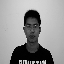

(64, 64)


In [0]:
# to view the image to check wether the path is correct or not
from google.colab.patches import cv2_imshow
img=cv2.imread(namedir[100],cv2.IMREAD_UNCHANGED)
img = cv2.resize(img,(64,64))
cv2_imshow(img)
print(img.shape)

In [0]:
traindata, testdata, trainlabel, testlabel = train_test_split(datamatrix,datalabel,test_size=0.33)
print(np.asarray(trainlabel).shape)
print(np.asarray(traindata).shape)
print(np.asarray(datamatrix).shape)

(562,)
(562, 64, 64)
(840, 64, 64)


In [0]:
from keras.utils import to_categorical
print(np.asarray(traindata).shape)
traindata = np.asarray(traindata).reshape(np.asarray(traindata).shape[0],64,64,1).astype('float32')/255 #converts to column vector
testdata = np.asarray(testdata).reshape(np.asarray(testdata).shape[0],64,64,1).astype('float32')/255
print(np.asarray(traindata).shape)



(562, 64, 64)
(562, 64, 64, 1)


In [0]:
trainlabel = to_categorical(trainlabel) #to_categorical used for onehot encoding
testlabel = to_categorical(testlabel)
trainlabel=np.asarray(trainlabel)
testlabel=np.asarray(testlabel)
print(np.asarray(trainlabel).shape)
testlabel[4]

(562, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
#CONVOLUTION NEURAL NETWORK WITHOUT DROPOUTS (to prevent overfitting)
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(64,64,1))) #initially there is an input dimension mention because the n/w needs to get the input dimension
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(len(lis), activation = 'softmax'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)    

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(traindata, trainlabel,  batch_size=64, epochs=20, validation_data=(testdata,testlabel))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 562 samples, validate on 278 samples
Epoch 1/20
562/562 [==============================] - 5s 9ms/step - loss: 2.3056 - acc: 0.1121 - val_loss: 2.2907 - val_acc: 0.0612
Epoch 2/20
562/562 [==============================] - 4s 7ms/step - loss: 2.1323 - acc: 0.2206 - val_loss: 1.9388 - val_acc: 0.3165
Epoch 3/20
562/562 [==============================] - 4s 7ms/step - loss: 1.4743 - acc: 0.4342 - val_loss: 1.3952 - val_acc: 0.3921
Epoch 4/20
562/562 [==============================] - 4s 7ms/step - loss: 1.0300 - acc: 0.5694 - val_loss: 0.9556 - val_acc: 0.5863
Epoch 5/20
562/562 [==============================] - 4s 7ms/step - loss: 0.7133 - acc: 0.7295 - val_loss: 0.9881 - val_acc: 0.6367
Epoch 6/20
562/562 [==============================] - 4s 7ms/step - loss: 0.5756 - acc: 0.7847 - val_loss: 0.6621 - val_acc: 0.7266
Epoch 7/20
562/562 [==============================] - 4s 7ms/step

In [0]:
#CONVOLUTION NEURAL NETWORK WITH DROPOUTS (to prevent overfitting)
#instantiating a small convnet

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(64,64,1))) #initially there is an input dimension mention because the n/w needs to get the input dimension
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.5))
#model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(len(lis), activation = 'softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 128)      

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(traindata, trainlabel,  batch_size=64, epochs=20, validation_data=(testdata,testlabel))

Train on 562 samples, validate on 278 samples
Epoch 1/20
562/562 [==============================] - 7s 12ms/step - loss: 0.1946 - acc: 0.9395 - val_loss: 0.2139 - val_acc: 0.9353
Epoch 2/20
562/562 [==============================] - 6s 10ms/step - loss: 0.0607 - acc: 0.9804 - val_loss: 0.1403 - val_acc: 0.9460
Epoch 3/20
562/562 [==============================] - 6s 10ms/step - loss: 0.0350 - acc: 0.9947 - val_loss: 0.1158 - val_acc: 0.9604
Epoch 4/20
562/562 [==============================] - 6s 10ms/step - loss: 0.0249 - acc: 0.9947 - val_loss: 0.0956 - val_acc: 0.9676
Epoch 5/20
562/562 [==============================] - 6s 10ms/step - loss: 0.0118 - acc: 0.9964 - val_loss: 0.0923 - val_acc: 0.9640
Epoch 6/20
562/562 [==============================] - 6s 10ms/step - loss: 0.0262 - acc: 0.9893 - val_loss: 0.1197 - val_acc: 0.9640
Epoch 7/20
562/562 [==============================] - 6s 10ms/step - loss: 0.0185 - acc: 0.9964 - val_loss: 0.1094 - val_acc: 0.9748
Epoch 8/20
562/562 [===

Raw output:
 [[1.6650791e-06 1.7615122e-10 1.0331599e-11 3.8561491e-11 9.9995458e-01
  1.7591145e-05 5.7401285e-06 2.0411553e-05 3.0861070e-17 1.8983799e-08]]
Rounded off: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


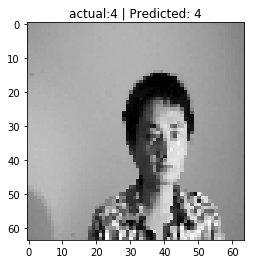

In [0]:
# to check the trained model
imid=10 #enter any number of your choice
raw_prediction = model.predict(np.expand_dims(testdata[imid], axis=0))
print("Raw output:\n", raw_prediction)
print("Rounded off:",np.round(raw_prediction))

plt.imshow(np.squeeze(testdata[imid]), cmap='gray')
plt.title("actual:{} | Predicted: {}".format( np.argmax(testlabel[imid]),np.argmax(raw_prediction)))
plt.show()